# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
import time

# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Slow down hit rate limit for this API
    time.sleep(1)
    
    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hadibu
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | maputo
Processing Record 8 of Set 1 | dryden
Processing Record 9 of Set 1 | fonte boa
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | gornopravdinsk
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | pechora
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | hayma'
City not found. Skipping...


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadibu,12.6500,54.0333,82.26,76,2,5.53,YE,1713650013
1,port-aux-francais,-49.3500,70.2167,46.85,94,97,32.32,TF,1713650014
2,puerto ayora,-0.7393,-90.3518,82.36,94,63,3.00,EC,1713650015
3,lihue,21.9789,-159.3672,79.84,68,20,12.66,US,1713650017
4,atafu village,-8.5421,-172.5159,85.06,76,2,12.44,TK,1713650018


In [7]:
# Export the City_Data into a csv
import csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/cities.csv", index_col="City_ID")

In [23]:
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,82.26,76,2,5.53,YE,2024-04-20 21:53:33
1,port-aux-francais,-49.3500,70.2167,46.85,94,97,32.32,TF,2024-04-20 21:53:34
2,puerto ayora,-0.7393,-90.3518,82.36,94,63,3.00,EC,2024-04-20 21:53:35
3,lihue,21.9789,-159.3672,79.84,68,20,12.66,US,2024-04-20 21:53:37
4,atafu village,-8.5421,-172.5159,85.06,76,2,12.44,TK,2024-04-20 21:53:38


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [27]:
city_data_df_lat = city_data_df.loc[:,'Lat']
city_data_df_maxtemp = city_data_df.loc[:,'Max Temp']

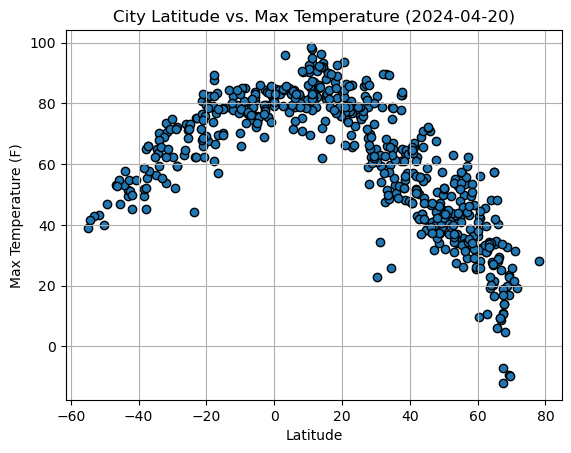

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df_lat, city_data_df_maxtemp, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (2024-04-20)')
plt.grid()

# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [28]:
city_data_df_humidity = city_data_df.loc[:,'Humidity']

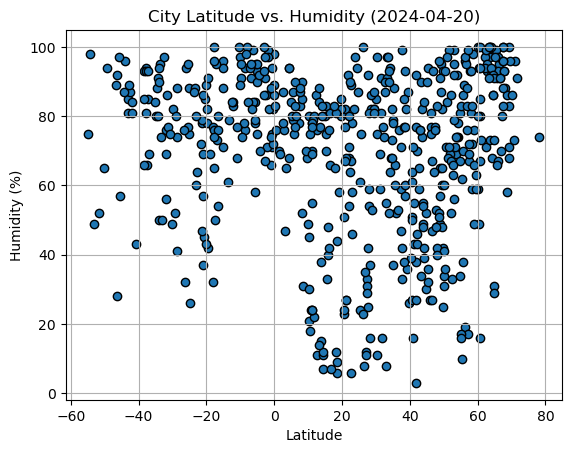

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df_lat, city_data_df_humidity, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-04-20)')
plt.grid()

# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [30]:
city_data_df_cloud = city_data_df.loc[:,'Cloudiness']

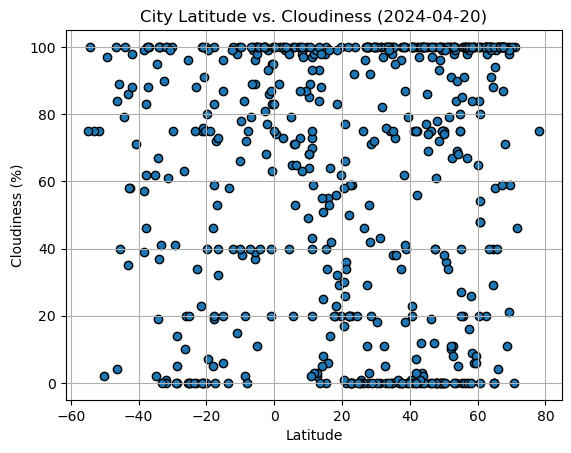

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df_lat, city_data_df_cloud, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-04-20)')
plt.grid()

# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [33]:
city_data_df_windspeed = city_data_df.loc[:,'Wind Speed']

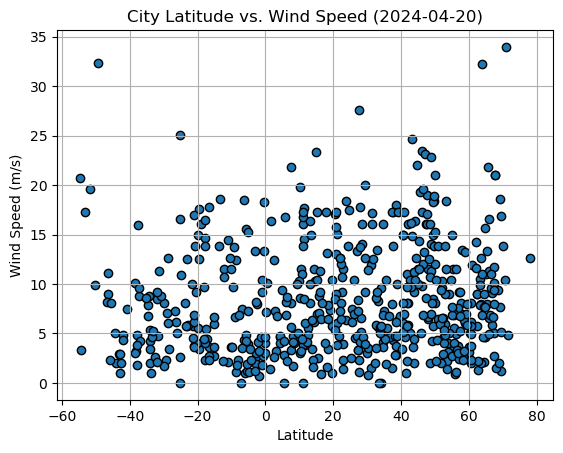

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df_lat, city_data_df_windspeed, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-04-20)')
plt.grid()

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [179]:
# Define a function to create Linear Regression plots

# Generate x-value for scatter plot and linear regression plot
x_north = northern_hemi_df['Lat']
x_south = southern_hemi_df['Lat']

# Generate y-value for Temp vs. Lat linear regression plot
y_north_temp = northern_hemi_df['Max Temp']
y_south_temp = southern_hemi_df['Max Temp']

# Generate y-value for Humidity vs. Lat linear regression plot
y_north_humid = northern_hemi_df['Humidity']
y_south_humid = southern_hemi_df['Humidity']

# Generate y-value for Cloudiness vs. Lat linear regression plot
y_north_cloud = northern_hemi_df['Cloudiness']
y_south_cloud = southern_hemi_df['Cloudiness']

# Generate y-value for Wind Speed vs. Lat linear regression plot
y_north_wind = northern_hemi_df['Wind Speed']
y_south_wind = southern_hemi_df['Wind Speed']

In [180]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,82.26,76,2,5.53,YE,2024-04-20 21:53:33
3,lihue,21.9789,-159.3672,79.84,68,20,12.66,US,2024-04-20 21:53:37
7,dryden,49.7833,-92.7503,43.09,42,75,18.41,CA,2024-04-20 21:53:42
10,bethel,41.3712,-73.4140,65.75,43,75,1.01,US,2024-04-20 21:49:30
11,dudinka,69.4058,86.1778,-9.38,100,98,1.25,RU,2024-04-20 21:53:48


In [181]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,46.85,94,97,32.32,TF,2024-04-20 21:53:34
2,puerto ayora,-0.7393,-90.3518,82.36,94,63,3.00,EC,2024-04-20 21:53:35
4,atafu village,-8.5421,-172.5159,85.06,76,2,12.44,TK,2024-04-20 21:53:38
5,invercargill,-46.4000,168.3500,53.02,92,84,8.99,NZ,2024-04-20 21:50:47
6,maputo,-25.9653,32.5892,73.08,94,20,5.01,MZ,2024-04-20 21:53:40


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.876772919743391


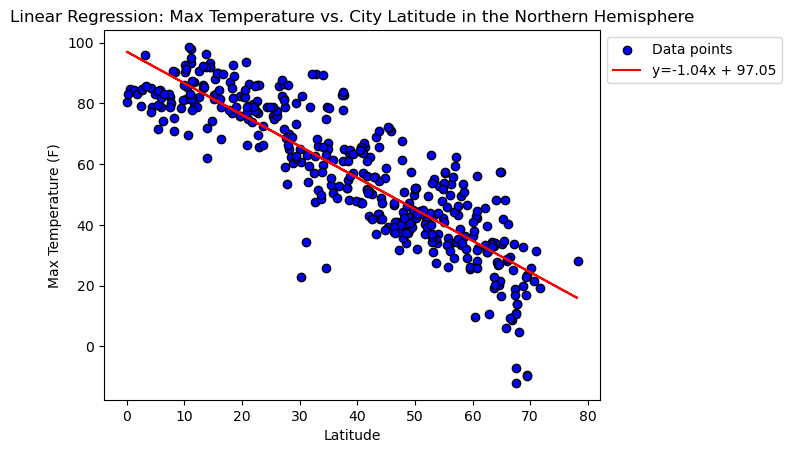

In [204]:
# Linear regression on NORTHERN hemisphere

# Calculate the linear regression between latitude and maximum temperature
(slope_lat_temp_north, 
 intercept_lat_temp_north, 
 rvalue_lat_temp_north, 
 pvalue_lat_temp_north, 
 stderr_lat_temp_north
) = linregress(x_north, y_north_temp)

# Calculate the corresponding y-values based on the regression equation
regression_y_lat_temp_north = x_north * slope_lat_temp_north + intercept_lat_temp_north

# Plot the Data and Regression Line
plt.scatter(x_north, y_north_temp, color='blue', label='Data points', edgecolor='black')
plt.plot(x_north, regression_y_lat_temp_north, color='red', 
         label=f'y={slope_lat_temp_north:.2f}x + {intercept_lat_temp_north:.2f}')
plt.title('Linear Regression: Max Temperature vs. City Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show

print(f'The r-value is: {rvalue_lat_temp_north}')

The r-value is: 0.8362375428253922


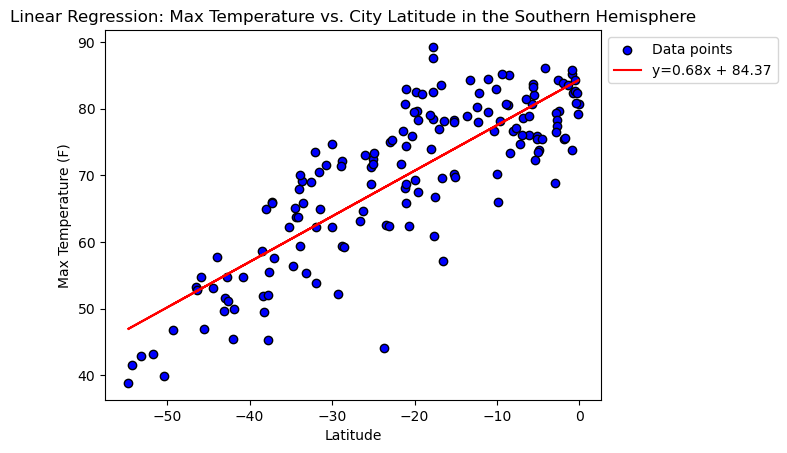

In [199]:
# Linear regression on SOUTHERN Hemisphere

# Calculate the linear regression between latitude and maximum temperature
(slope_lat_temp_south, 
 intercept_lat_temp_south, 
 rvalue_lat_temp_south, 
 pvalue_lat_temp_south, 
 stderr_lat_temp_south
) = linregress(x_south, y_south_temp)

# Calculate the corresponding y-values based on the regression equation
regression_y_lat_temp_south = x_south * slope_lat_temp_south + intercept_lat_temp_south

# Plot the Data and Regression Line
plt.scatter(x_south, y_south_temp, color='blue', label='Data points', edgecolor='black')
plt.plot(x_south, regression_y_lat_temp_south, color='red', 
         label=f'y={slope_lat_temp_south:.2f}x + {intercept_lat_temp_south:.2f}')
plt.title('Linear Regression: Max Temperature vs. City Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show

print(f'The r-value is: {rvalue_lat_temp_south}')

**Discussion about the linear relationship:** The linear regression analysis for Temperature vs. City Latitude in the Northern Hemisphere demonstrates a strong negative correlation (slope = -1.04, r-value = -0.877), indicating that temperature decreases as latitude increases, which is statistically very significant (p-value = 3.7e-131). In contrast, the Southern Hemisphere shows a strong positive correlation (slope = 0.68, r-value = 0.836), suggesting that temperature increases as latitude increases, also with a high level of statistical significance (p-value = 8.2e-43), reflecting the inverse geographical trends across hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23318046391097208


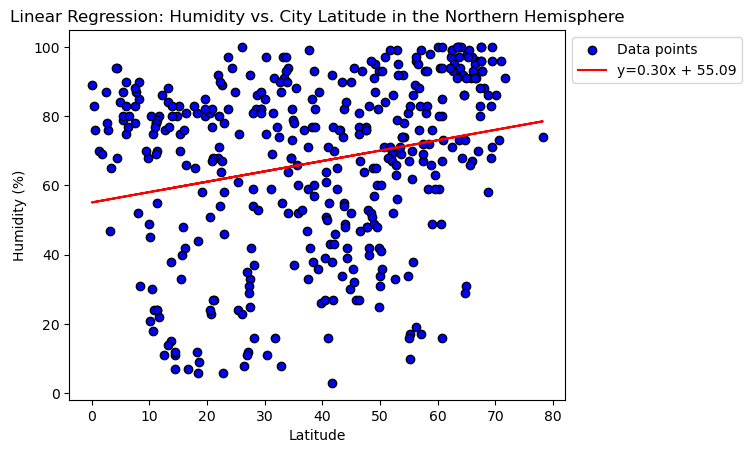

In [196]:
# Linear regression on NORTHERN hemisphere

# Calculate the linear regression between latitude and humidity
(slope_lat_humidity_north, 
 intercept_lat_humidity_north, 
 rvalue_lat_humidity_north, 
 pvalue_lat_humidity_north, 
 stderr_lat_humidity_north
) = linregress(x_north, y_north_humid)

# Calculate the corresponding y-values based on the regression equation
regression_y_lat_humidity_north = x_north * slope_lat_humidity_north + intercept_lat_humidity_north

# Plot the Data and Regression Line
plt.scatter(x_north, y_north_humid, color='blue', label='Data points', edgecolor='black')
plt.plot(x_north, regression_y_lat_humidity_north, color='red', 
         label=f'y={slope_lat_humidity_north:.2f}x + {intercept_lat_humidity_north:.2f}')
plt.title('Linear Regression: Humidity vs. City Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show

print(f'The r-value is: {rvalue_lat_humidity_north}')

The r-value is: 0.18122508939162849


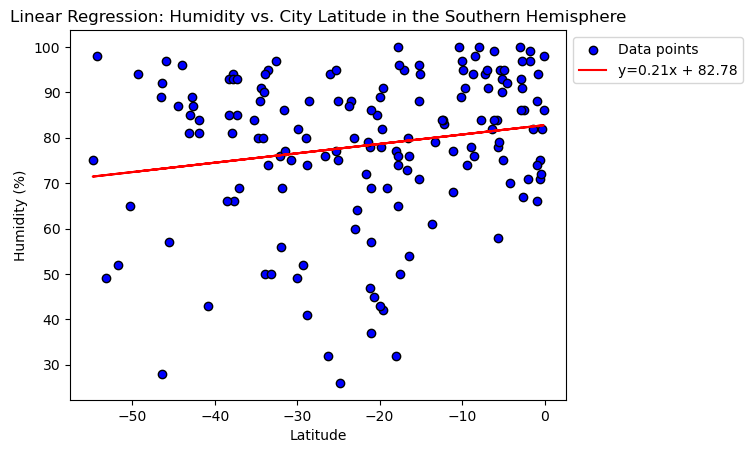

In [195]:
# Linear regression on SOUTHERN Hemisphere

# Calculate the linear regression between latitude and humidity
(slope_lat_humid_south, 
 intercept_lat_humid_south, 
 rvalue_lat_humid_south, 
 pvalue_lat_humid_south, 
 stderr_lat_humid_south
) = linregress(x_south, y_south_humid)

# Calculate the corresponding y-values based on the regression equation
regression_y_lat_humid_south = x_south * slope_lat_humid_south + intercept_lat_humid_south

# Plot the Data and Regression Line
plt.scatter(x_south, y_south_humid, color='blue', label='Data points', edgecolor='black')
plt.plot(x_south, regression_y_lat_humid_south, color='red', 
         label=f'y={slope_lat_humid_south:.2f}x + {intercept_lat_humid_south:.2f}')
plt.title('Linear Regression: Humidity vs. City Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show

print(f'The r-value is: {rvalue_lat_humid_south}')

**Discussion about the linear relationship:** The linear regression analysis for Humidity vs. City Latitude in the Northern Hemisphere shows a slightly stronger positive relationship (slope = 0.30, r-value = 0.233) compared to the Southern Hemisphere (slope = 0.21, r-value = 0.181), suggesting that humidity increases with latitude more noticeably in the north. Both regions display statistical significance in their models, albeit the relationship is weak, with p-values indicating that the observed correlations are unlikely to be due to chance (Northern p-value = 1.92e-06, Southern p-value = 0.022).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08449597345260185


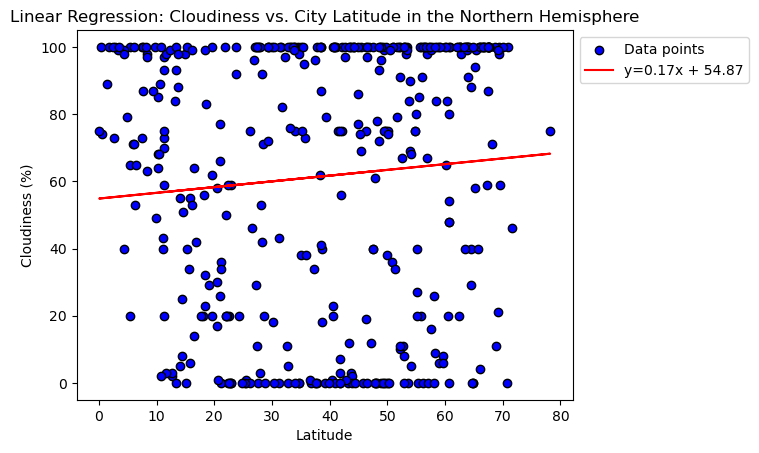

In [205]:
# Linear regression on NORTHERN hemisphere

# Calculate the linear regression between latitude and cloudiness
(slope_lat_cloud_north, 
 intercept_lat_cloud_north, 
 rvalue_lat_cloud_north, 
 pvalue_lat_cloud_north, 
 stderr_lat_cloud_north
) = linregress(x_north, y_north_cloud)

# Calculate the corresponding y-values based on the regression equation
regression_y_lat_cloud_north = x_north * slope_lat_cloud_north + intercept_lat_cloud_north

# Plot the Data and Regression Line
plt.scatter(x_north, y_north_cloud, color='blue', label='Data points', edgecolor='black')
plt.plot(x_north, regression_y_lat_cloud_north, color='red', 
         label=f'y={slope_lat_cloud_north:.2f}x + {intercept_lat_cloud_north:.2f}')
plt.title('Linear Regression: Cloudiness vs. City Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show

print(f'The r-value is: {rvalue_lat_cloud_north}')

The r-value is: 0.0897678159578025


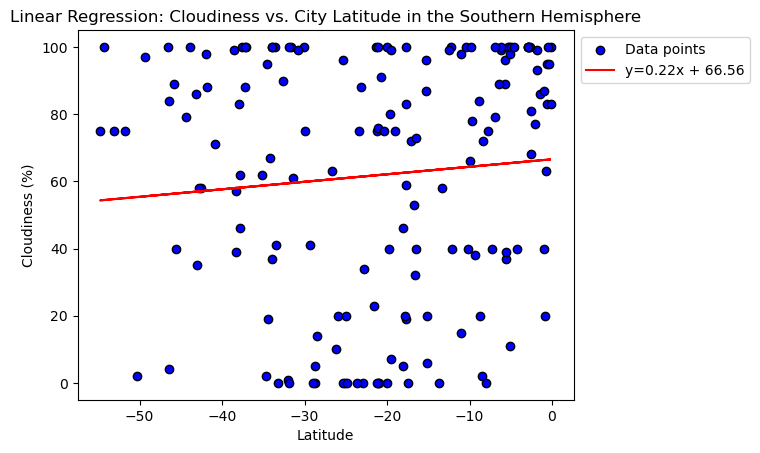

In [206]:
# Linear regression on SOUTHERN Hemisphere

# Calculate the linear regression between latitude and cloudiness
(slope_lat_cloud_south, 
 intercept_lat_cloud_south, 
 rvalue_lat_cloud_south, 
 pvalue_lat_cloud_south, 
 stderr_lat_cloud_south
) = linregress(x_south, y_south_cloud)

# Calculate the corresponding y-values based on the regression equation
regression_y_lat_cloud_south = x_south * slope_lat_cloud_south + intercept_lat_cloud_south

# Plot the Data and Regression Line
plt.scatter(x_south, y_south_cloud, color='blue', label='Data points', edgecolor='black')
plt.plot(x_south, regression_y_lat_cloud_south, color='red', 
         label=f'y={slope_lat_cloud_south:.2f}x + {intercept_lat_cloud_south:.2f}')
plt.title('Linear Regression: Cloudiness vs. City Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show

print(f'The r-value is: {rvalue_lat_cloud_south}')

**Discussion about the linear relationship:** The linear regression analysis for Cloudiness vs. City Latitude in the Northern Hemisphere shows a very weak positive correlation (slope = 0.17, r-value = 0.084) with marginal statistical significance (p-value = 0.088), suggesting a negligible relationship between latitude and cloudiness in this region. In contrast, the Southern Hemisphere also demonstrates a weak positive correlation (slope = 0.22, r-value = 0.090) but with even less statistical significance (p-value = 0.260), indicating a similarly weak relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05727112993329913


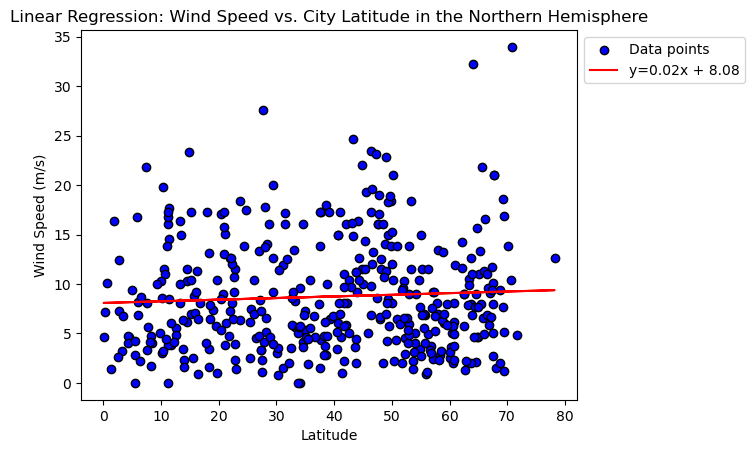

In [210]:
# Linear regression on NORTHERN hemisphere

# Calculate the linear regression between latitude and wind speed
(slope_lat_wind_north, 
 intercept_lat_wind_north, 
 rvalue_lat_wind_north, 
 pvalue_lat_wind_north, 
 stderr_lat_wind_north
) = linregress(x_north, y_north_wind)

# Calculate the corresponding y-values based on the regression equation
regression_y_lat_wind_north = x_north * slope_lat_wind_north + intercept_lat_wind_north

# Plot the Data and Regression Line
plt.scatter(x_north, y_north_wind, color='blue', label='Data points', edgecolor='black')
plt.plot(x_north, regression_y_lat_wind_north, color='red', 
         label=f'y={slope_lat_wind_north:.2f}x + {intercept_lat_wind_north:.2f}')
plt.title('Linear Regression: Wind Speed vs. City Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show

print(f'The r-value is: {rvalue_lat_wind_north}')

The r-value is: -0.12182582894243663


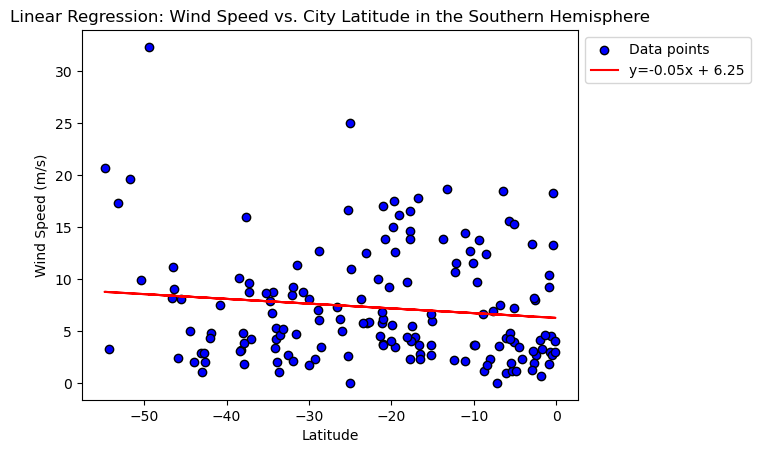

In [209]:
# Linear regression on SOUTHERN Hemisphere

# Calculate the linear regression between latitude and wind speed
(slope_lat_wind_south, 
 intercept_lat_wind_south, 
 rvalue_lat_wind_south, 
 pvalue_lat_wind_south, 
 stderr_lat_wind_south
) = linregress(x_south, y_south_wind)

# Calculate the corresponding y-values based on the regression equation
regression_y_lat_wind_south = x_south * slope_lat_wind_south + intercept_lat_wind_south

# Plot the Data and Regression Line
plt.scatter(x_south, y_south_wind, color='blue', label='Data points', edgecolor='black')
plt.plot(x_south, regression_y_lat_wind_south, color='red', 
         label=f'y={slope_lat_wind_south:.2f}x + {intercept_lat_wind_south:.2f}')
plt.title('Linear Regression: Wind Speed vs. City Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show

print(f'The r-value is: {rvalue_lat_wind_south}')

**Discussion about the linear relationship:** The linear regression analysis for Wind Speed vs. City Latitude in the Northern Hemisphere shows a very weak positive correlation (slope = 0.0165, r-value = 0.057) with no statistical significance (p-value = 0.248), indicating that changes in latitude have a negligible impact on wind speed. In contrast, the Southern Hemisphere displays a weak negative correlation (slope = -0.0457, r-value = -0.122) which also lacks statistical significance (p-value = 0.126), suggesting a slight decrease in wind speed with increasing latitude, but again, the relationship is not strong enough to be considered reliable.